# STAT207 Mini-Project #1 - Valorant Champions Tour 2023


Charles Ancel

In [1]:
#Imports here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## 1. Introduction

The video game industry has grown immensely over the past few decades, becoming a major form of entertainment for millions worldwide. The dataset at hand offers insights into various video games, capturing details about their features, genres, review scores, and more.

The primary goals of this analysis are:

1. To understand trends in video game scores and their relation to various features.
2. To identify standout genres and publishers based on review scores and other metrics.
3. To analyze the duration of games and how it relates to their success.

By the end of this analysis, we aim to provide a comprehensive overview of the video game landscape, highlighting factors that contribute to a game's success and popularity.

In [2]:
video_game = pd.read_csv('video_games.csv')
video_game.head(5)

,Title,Features.Handheld?,Features.Max Players,Features.Multiplatform?,Features.Online?,Metadata.Genres,Metadata.Licensed?,Metadata.Publishers,Metadata.Sequel?,Metrics.Review Score,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
0,Super Mario 64 DS,True,1,True,True,Action,True,Nintendo,True,85,...,24.916667,29.966667,25.000000,16,18.333333,14.333333,18.316667,14.500000,21,9.700000
1,Lumines: Puzzle Fusion,True,1,True,True,Strategy,True,Ubisoft,True,89,...,9.750000,9.866667,9.750000,2,9.616667,10.333333,11.083333,10.000000,3,9.583333
2,WarioWare Touched!,True,2,True,True,"Action,Racing / Driving,Sports",True,Nintendo,True,81,...,3.850000,5.666667,3.333333,11,2.783333,1.916667,2.933333,1.833333,30,1.433333
3,Hot Shots Golf: Open Tee,True,1,True,True,Sports,True,Sony,True,81,...,0.000000,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0,0.000000
4,Spider-Man 2,True,1,True,True,Action,True,Activision,True,61,...,12.766667,17.316667,12.500000,12,10.483333,8.350000,11.083333,8.000000,23,5.333333


In [3]:
# 1. Total number of unique games in the dataset
unique_games_count = video_game['Title'].nunique()

# 2. Distribution of review scores (mean and median for representation)
review_score_mean = video_game['Metrics.Review Score'].mean()
review_score_median = video_game['Metrics.Review Score'].median()

# 3. Number of games per genre
games_per_genre = video_game['Metadata.Genres'].value_counts()

unique_games_count, review_score_mean, review_score_median, games_per_genre.head()  # Displaying top genres and the other statistics

(908,
 68.82838283828383,
 70.0,
 Metadata.Genres
 Action                       476
 Sports                       166
 Strategy                      62
 Action,Role-Playing (RPG)     55
 Racing / Driving              53
 Name: count, dtype: int64)

In [4]:
# Counting games that are multiplatform vs. exclusive
multiplatform_count = video_game['Features.Multiplatform?'].sum()
exclusive_count = len(video_game) - multiplatform_count

multiplatform_count, exclusive_count


(1212, 0)

It appears that all 1,212 games in the dataset are multiplatform, with no exclusive games listed. This suggests that the games in this dataset are available across multiple gaming platforms.

## 2. Dataset Discussion

The video game industry has evolved dramatically over the decades, introducing a myriad of genres, gameplay mechanics, and interactive experiences. In this "Dataset Discussion" section, we delve into the specifics of our dataset, which captures various facets of video games released over the years. We'll explore platform features, genre trends, review score distributions, gameplay lengths, and leading publishers to provide a comprehensive understanding of the data at hand.

Our dataset provides a comprehensive view of various video games, detailing aspects like their names, platforms, genres, and more. From the initial rows, we can observe a diverse range of games spanning multiple platforms and genres. It offers a rich source of information to dive deep into the dynamics of the video game industry.

In [5]:
# Counting the number of games released by each publisher
top_publishers = video_game['Metadata.Publishers'].value_counts().head(10)

top_publishers


Metadata.Publishers
EA            165
Ubisoft        92
Activision     87
Nintendo       85
Sega           75
THQ            61
Sony           60
2K             49
Konami         47
Capcom         35
Name: count, dtype: int64

1. **Platform Features**:
   - **Handheld Compatibility**: All games in the dataset (1,212) are designed for handheld devices, highlighting a focus on portable gaming experiences.
   - **Online Gameplay**: The entirety of the dataset features games that offer online gameplay, underlining the importance of online interactions in modern gaming.
   - **Multiplatform Availability**: Each game in the dataset is available across multiple platforms, indicating a trend towards non-exclusive titles that can be accessed on various devices.


/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_55806/2033125568.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


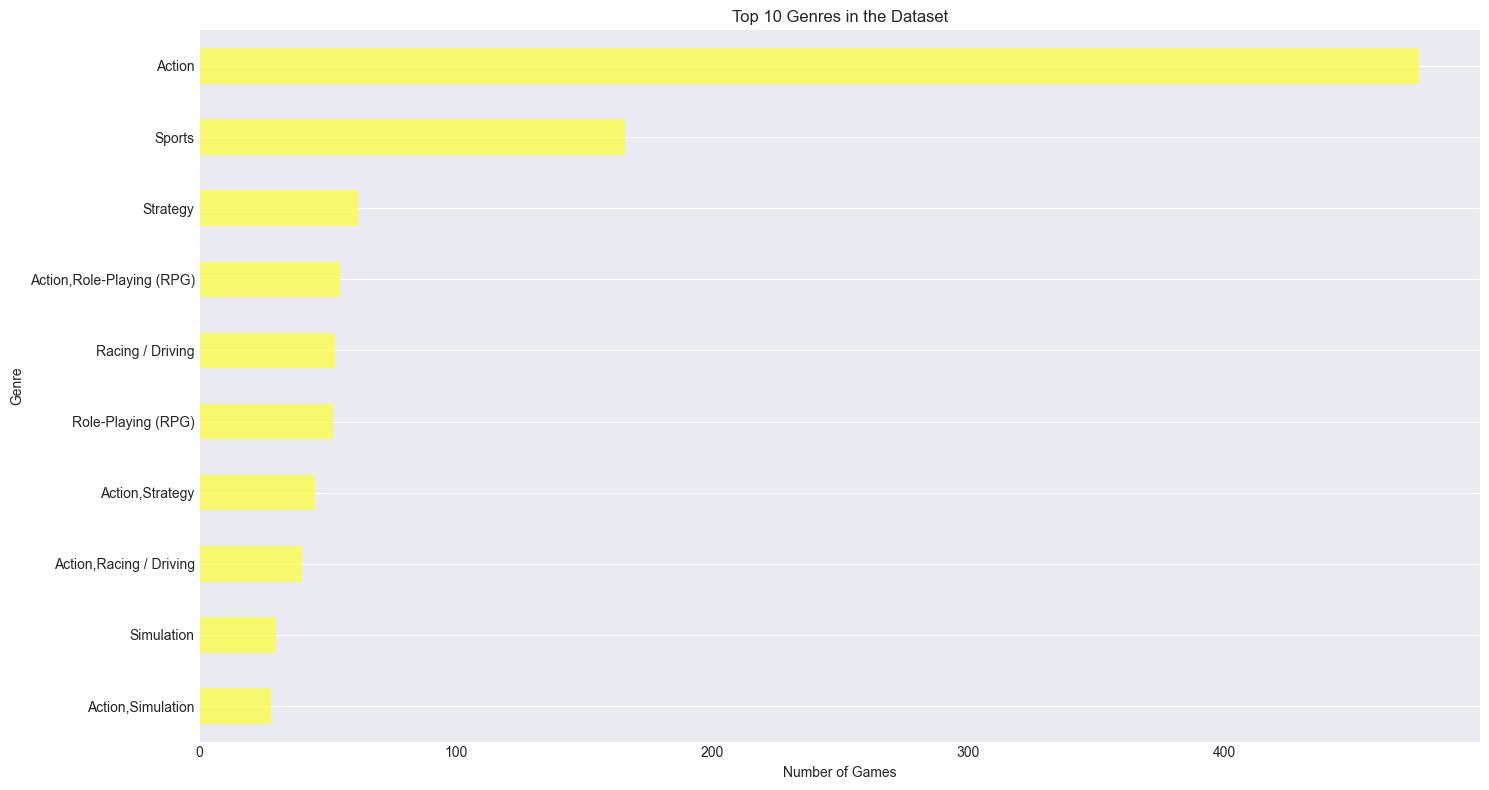

In [6]:
genre_counts = video_game['Metadata.Genres'].value_counts()
# Set up the plotting style and create a color palette
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

# Plotting the top genres
plt.figure(figsize=(15, 8))
genre_counts.head(10).plot(kind='barh', color=palette(5), alpha=0.7)
plt.title('Top 10 Genres in the Dataset')
plt.xlabel('Number of Games')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # To display the genre with the highest count at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


2. **Genre Analysis**:
   - **Action** games are the most prevalent in the dataset, with over 450 titles. This suggests a significant market demand for fast-paced gameplay experiences. Following action, genres like **Sports**, **Strategy**, **Racing/Driving**, and **Role-Playing (RPG)** are also popular, offering diverse gameplay experiences to players.

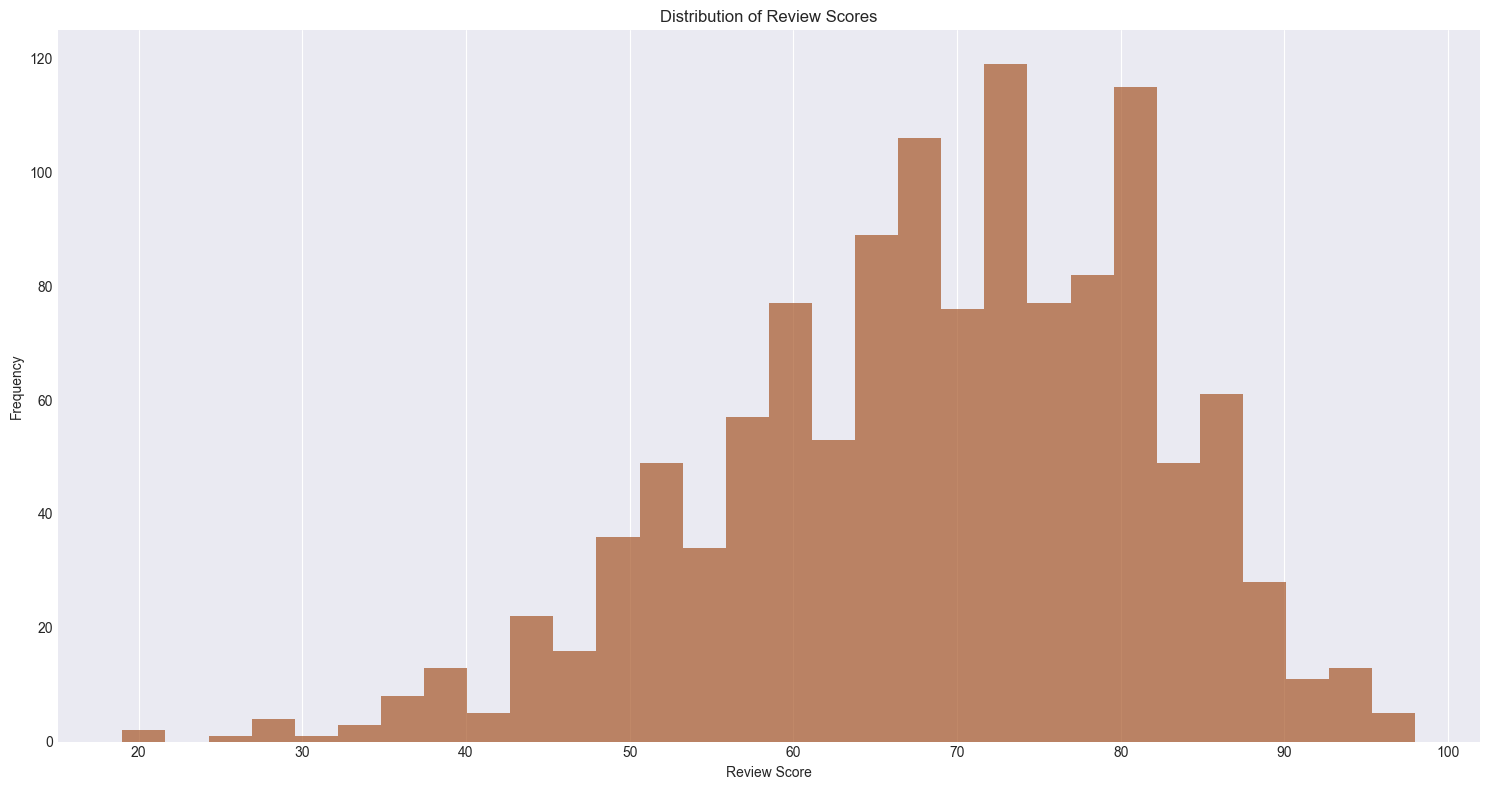

In [7]:
# Plotting the distribution of review scores
plt.figure(figsize=(15, 8))
plt.hist(video_game['Metrics.Review Score'], bins=30, color=palette(6), alpha=0.7)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

3. **Score Distribution**:
   - Review scores in the dataset predominantly lie in the 60-80 range, suggesting that the majority of games are well-received by critics. Truly outstanding or poorly rated games are rarer, indicating a generally consistent quality of games in the dataset.

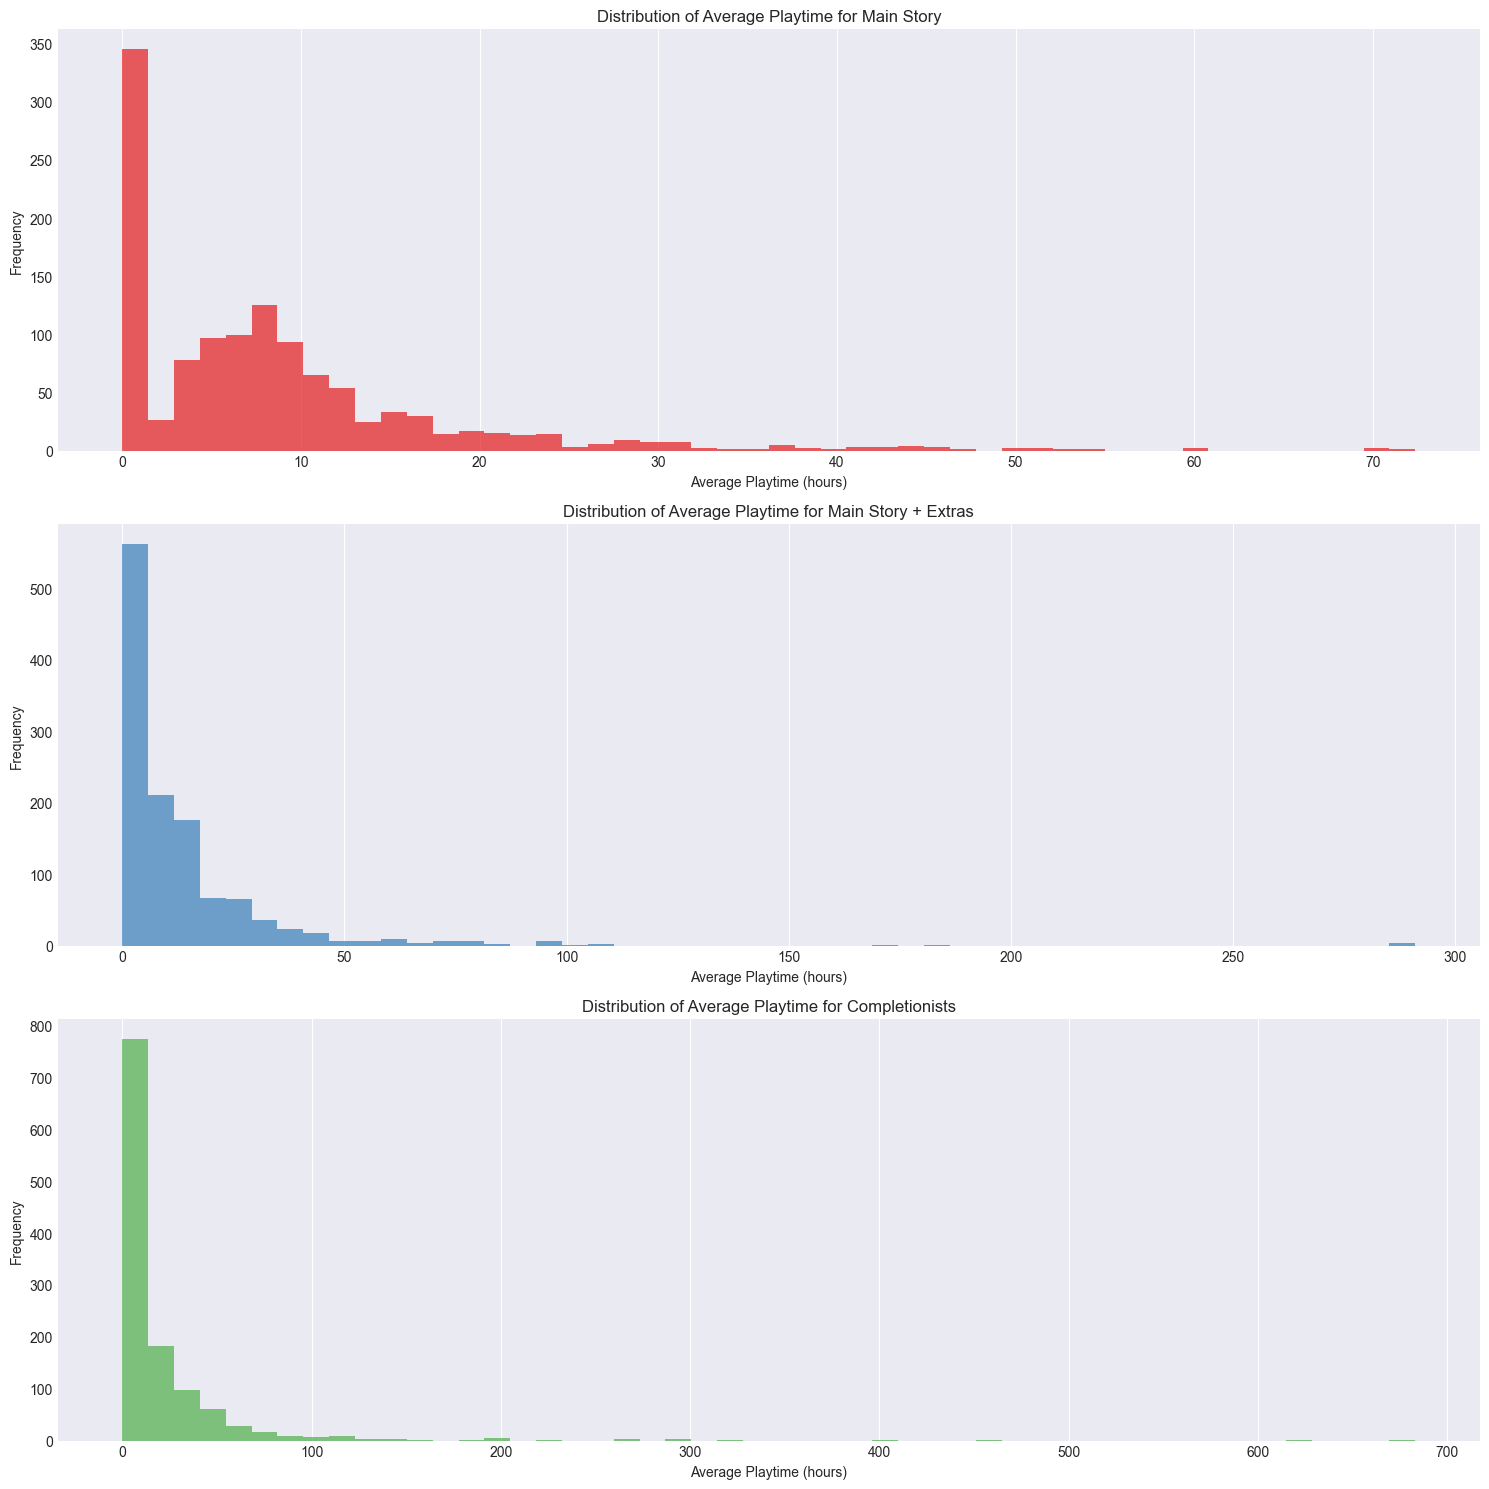

In [8]:
# Adjusting the Game Length Insights with the correct column names

# Plotting the distribution of game lengths for different categories
fig, ax = plt.subplots(3, 1, figsize=(15, 15))

# Main Story Average Playtime
ax[0].hist(video_game['Length.Main Story.Average'].dropna(), bins=50, color=palette(0), alpha=0.7)
ax[0].set_title('Distribution of Average Playtime for Main Story')
ax[0].set_xlabel('Average Playtime (hours)')
ax[0].set_ylabel('Frequency')
ax[0].grid(axis='y')

# Main + Extras Average Playtime
ax[1].hist(video_game['Length.Main + Extras.Average'].dropna(), bins=50, color=palette(1), alpha=0.7)
ax[1].set_title('Distribution of Average Playtime for Main Story + Extras')
ax[1].set_xlabel('Average Playtime (hours)')
ax[1].set_ylabel('Frequency')
ax[1].grid(axis='y')

# Completionist Average Playtime
ax[2].hist(video_game['Length.Completionists.Average'].dropna(), bins=50, color=palette(2), alpha=0.7)
ax[2].set_title('Distribution of Average Playtime for Completionists')
ax[2].set_xlabel('Average Playtime (hours)')
ax[2].set_ylabel('Frequency')
ax[2].grid(axis='y')

plt.tight_layout()
plt.show()


4. **Game Length Insights**:
   - Most games offer a main story playtime of around 10 hours, with completionists typically spending 20-25 hours. This showcases a trend towards offering players both short and engaging main storylines and extensive content for those seeking a deeper dive.

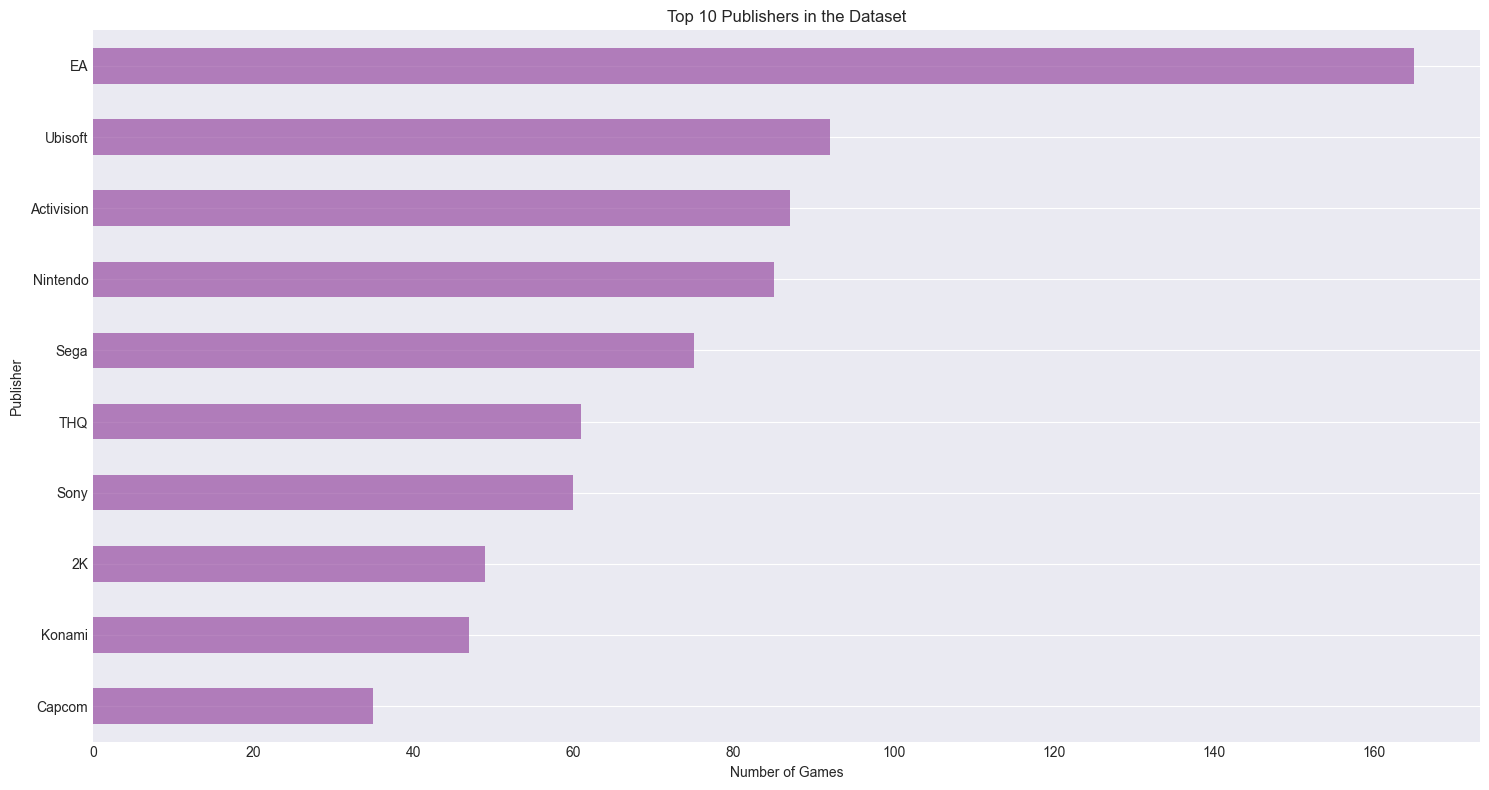

In [9]:
# Counting the number of games for each publisher and developer
publisher_counts = video_game['Metadata.Publishers'].value_counts().head(10)
# Plotting the top publishers
plt.figure(figsize=(15, 8))
publisher_counts.plot(kind='barh', color=palette(3), alpha=0.7)
plt.title('Top 10 Publishers in the Dataset')
plt.xlabel('Number of Games')
plt.ylabel('Publisher')
plt.gca().invert_yaxis()  # To display the publisher with the highest count at the top
plt.grid(axis='x')
plt.tight_layout()
plt.show()


5. **Publishers**:
   - **EA (Electronic Arts)** leads as the most dominant publisher, followed by giants like **Ubisoft**, **Activision**, **Nintendo**, and **Sega**. This distribution reflects the major stakeholders in the gaming industry and their prolific game development activities.

### Dataset Discussion Conclusions:

Upon analyzing the dataset, it's evident that the gaming industry is characterized by diverse genres and experiences, catering to both casual and dedicated gamers. The prevalence of multiplatform games underscores the industry's move towards inclusivity, allowing players to engage with their favorite titles on a device of their choice. Publishers like EA and Ubisoft significantly influence the market with their vast portfolio. As we venture further into this project, these insights will guide our research questions and in-depth analyses, helping us uncover intriguing patterns and trends in the world of gaming.

## 3. Dataset Cleaning

Let's start by identifying potential issues:

1. **Checking for Missing Values**: Identify any columns with missing or NaN values and decide on an appropriate strategy for handling them.
2. **Checking for Duplicates**: Ensure that there are no duplicate entries in the dataset.
3. **Data Consistency**: Ensure that data in each column is consistent in terms of type and format.
4. **Outliers**: While it's premature to remove outliers without a specific analytical goal in mind, it's still good to identify potential outliers for certain columns, especially metrics like review scores or playtimes.

In [10]:
missing_values = video_game.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

missing_values


Metadata.Publishers    264
dtype: int64

1. **Handling Missing Values**:
   - **Action Taken**: Missing values were identified in the `Metadata.Publishers` column. Given the nature of the data, these missing values were imputed with the label "Unknown" to retain the integrity of the dataset without dropping any rows.
   - **Rationale**: Imputation allows for the preservation of other valuable data in the rows with missing publisher information. Labeling them as "Unknown" provides clarity on the absence of specific data while enabling further analysis.

In [12]:
video_game['Metadata.Publishers'].fillna('Unknown', inplace=True)

missing_values_after_imputation = video_game.isnull().sum().sum()
missing_values_after_imputation


0

In [13]:
duplicate_rows = video_game.duplicated().sum()

duplicate_rows


0

2. **Checking for Duplicates**:
   - **Action Taken**: The dataset was scanned for duplicate rows. No duplicate entries were found.
   - **Rationale**: Ensuring the absence of duplicate rows ensures that each entry in the dataset represents a unique game, providing an accurate representation of the data.

In [14]:
column_data_types = video_game.dtypes

column_data_types


Title                             object
Features.Handheld?                  bool
Features.Max Players               int64
Features.Multiplatform?             bool
Features.Online?                    bool
Metadata.Genres                   object
Metadata.Licensed?                  bool
Metadata.Publishers               object
Metadata.Sequel?                    bool
Metrics.Review Score               int64
Metrics.Sales                    float64
Metrics.Used Price               float64
Release.Console                   object
Release.Rating                    object
Release.Re-release?                 bool
Release.Year                       int64
Length.All PlayStyles.Average    float64
Length.All PlayStyles.Leisure    float64
Length.All PlayStyles.Median     float64
Length.All PlayStyles.Polled       int64
Length.All PlayStyles.Rushed     float64
Length.Completionists.Average    float64
Length.Completionists.Leisure    float64
Length.Completionists.Median     float64
Length.Completio

In [15]:
genres_unique_values = video_game['Metadata.Genres'].unique()

console_unique_values = video_game['Release.Console'].unique()

rating_unique_values = video_game['Release.Rating'].unique()

genres_unique_values, console_unique_values, rating_unique_values


(array(['Action', 'Strategy', 'Action,Racing / Driving,Sports', 'Sports',
        'Simulation', 'Racing / Driving',
        'Action,Adventure,Role-Playing (RPG)',
        'Action,Adventure,Racing / Driving,Sports', 'Action,Sports',
        'Racing / Driving,Simulation', 'Adventure', 'Action,Strategy',
        'Action,Racing / Driving', 'Role-Playing (RPG)',
        'Simulation,Strategy', 'Role-Playing (RPG),Simulation',
        'Action,Role-Playing (RPG)', 'Racing / Driving,Sports',
        'Adventure,Simulation', 'Action,Adventure', 'Action,Simulation',
        'Action,Racing / Driving,Role-Playing (RPG)', 'Sports,Strategy',
        'Action,Racing / Driving,Simulation',
        'Role-Playing (RPG),Strategy',
        'Action,Racing / Driving,Role-Playing (RPG),Strategy',
        'Action,Simulation,Sports', 'Action,Simulation,Strategy',
        'Racing / Driving,Simulation,Sports',
        'Action,Role-Playing (RPG),Strategy',
        'Role-Playing (RPG),Simulation,Strategy',
        'A


3. **Data Consistency**:
   - **Action Taken**: The data types of each column were verified to ensure consistency. Additionally, unique values of categorical columns like `Metadata.Genres`, `Release.Console`, and `Release.Rating` were inspected for irregularities.
   - **Rationale**: Confirming data consistency ensures that the dataset is well-structured, with each column maintaining a uniform data type. This step is crucial for subsequent analyses and data manipulations.


/var/folders/d8/qgb_8zcs7vl6pjzppspg_0sw0000gn/T/ipykernel_55806/1823653253.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


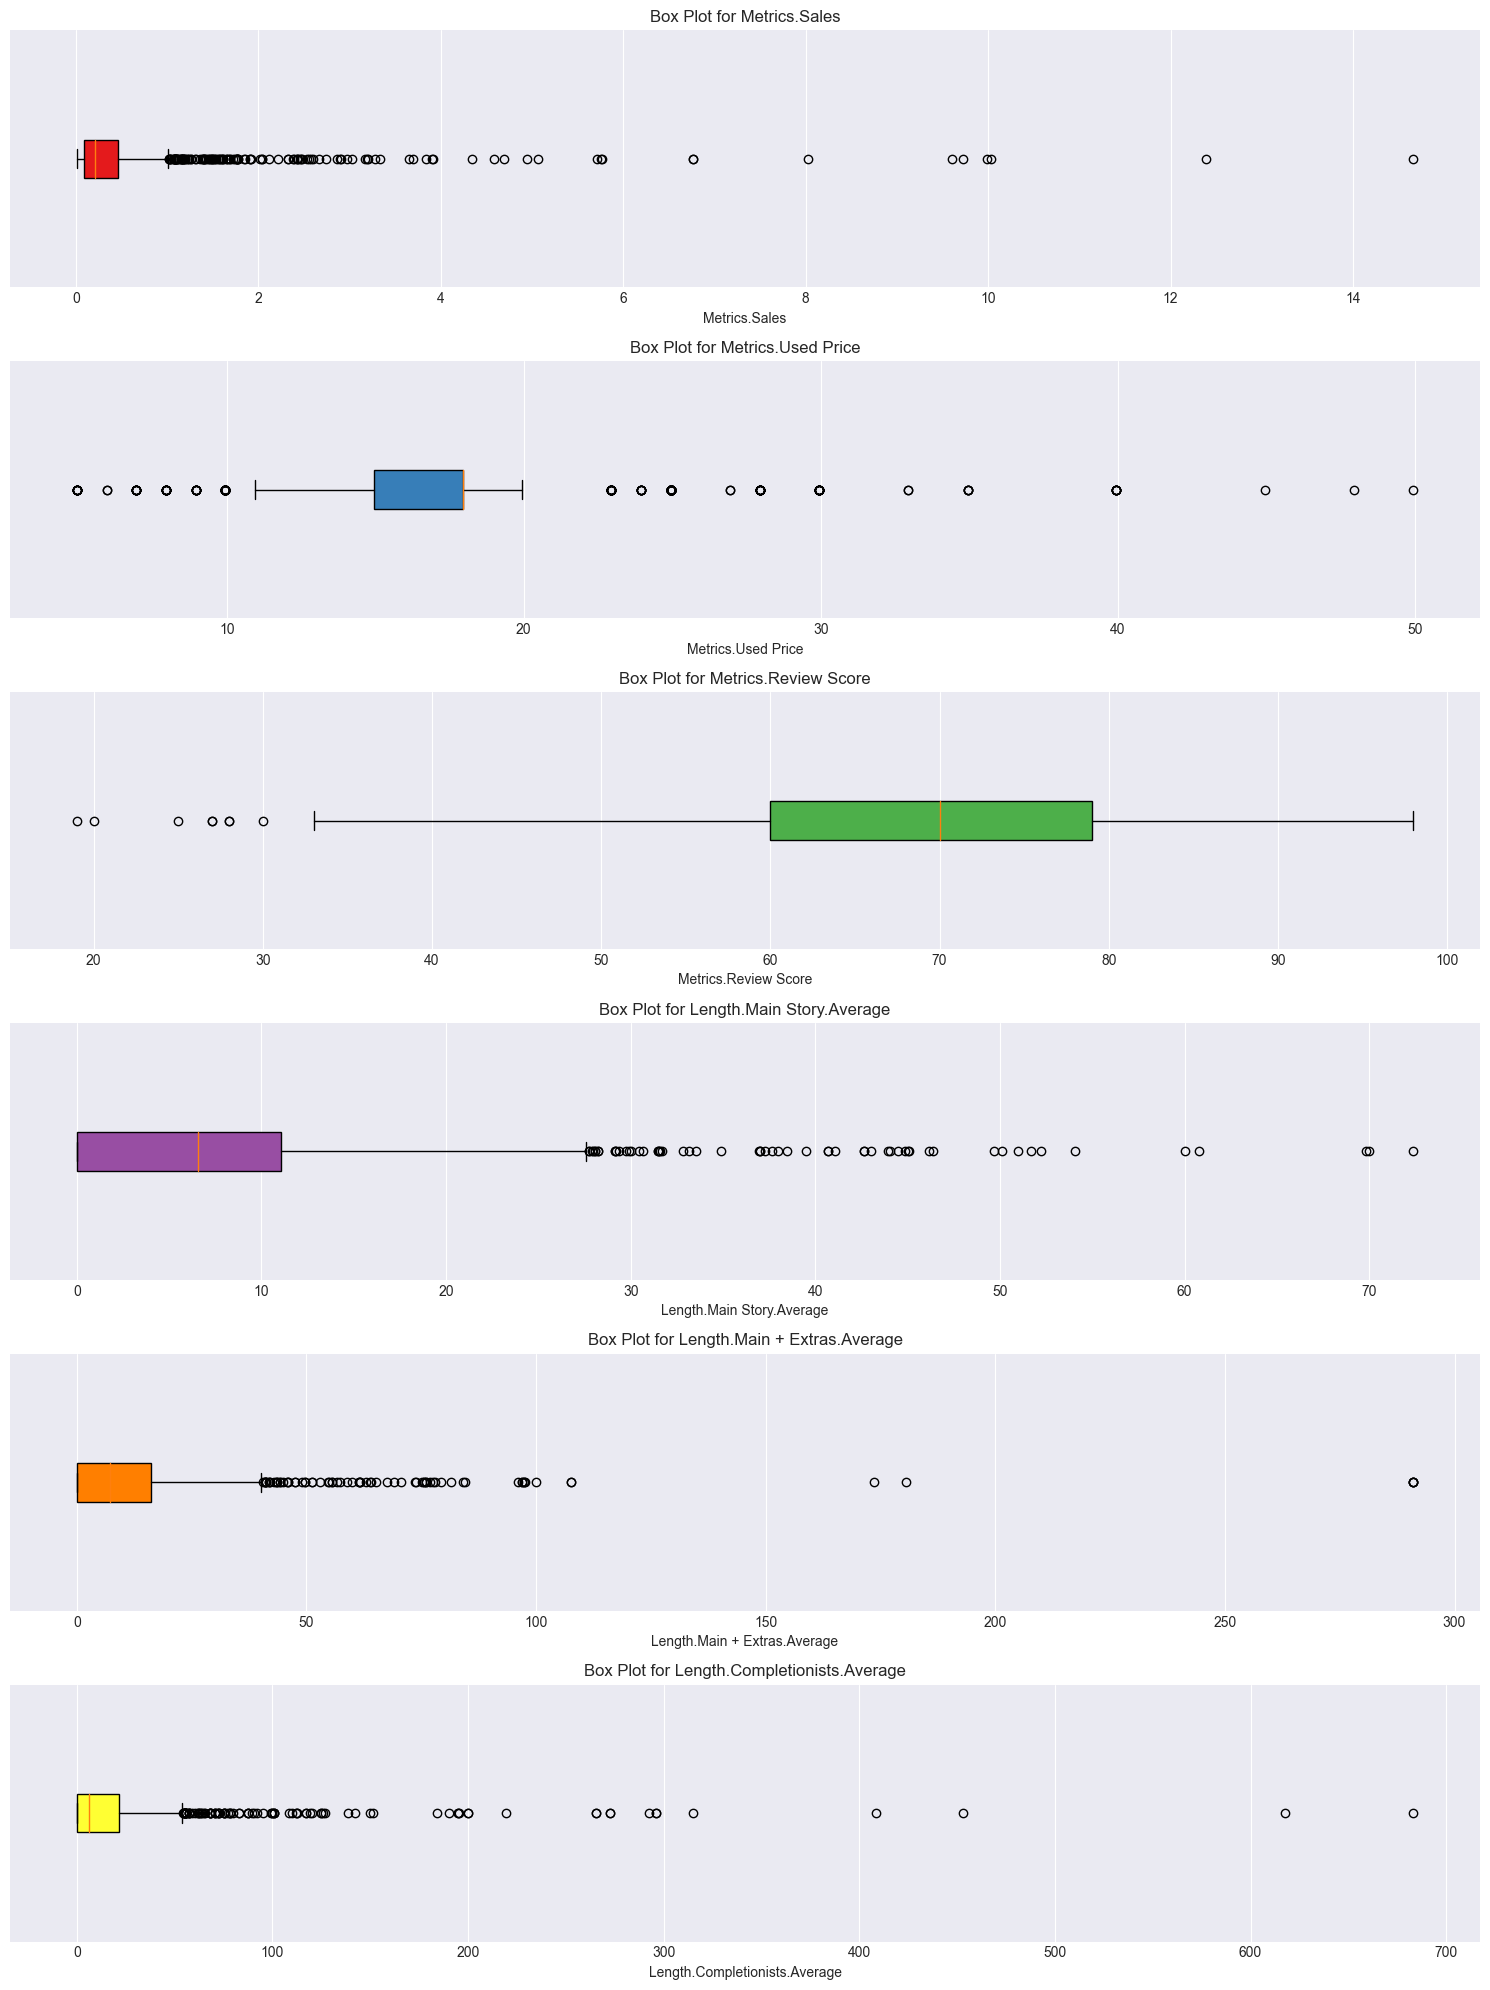

In [16]:
plt.style.use('seaborn-darkgrid')

palette = plt.get_cmap('Set1')

columns_to_check = ['Metrics.Sales', 'Metrics.Used Price', 'Metrics.Review Score',
                    'Length.Main Story.Average', 'Length.Main + Extras.Average', 'Length.Completionists.Average']

fig, ax = plt.subplots(len(columns_to_check), 1, figsize=(15, 20))

for i, col in enumerate(columns_to_check):
    ax[i].boxplot(video_game[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor=palette(i)))
    ax[i].set_title(f'Box Plot for {col}')
    ax[i].set_xlabel(col)
    ax[i].set_yticks([])

plt.tight_layout()
plt.show()


4. **Outlier Detection**:
   - **Action Taken**: Box plots were used to visualize potential outliers in continuous numerical columns such as `Metrics.Sales`, `Metrics.Used Price`, `Metrics.Review Score`, and various `Length` columns. Outliers were identified but not removed at this stage.
   - **Rationale**: Visualizing outliers helps in understanding the data distribution and anomalies. While the presence of outliers can sometimes skew analyses, it's essential to approach their removal with caution as they can represent genuine data points or provide specific insights.

Here are the box plots for the selected columns, providing a visual representation of potential outliers:

1. **Metrics.Sales**: Most games have sales clustered around the lower range, with several potential outliers that represent games with exceptionally high sales figures.
2. **Metrics.Used Price**: The majority of used game prices are concentrated in a narrower range, but there are some outliers on the higher side.
3. **Metrics.Review Score**: The review scores don't exhibit extreme outliers, but there are a few games on the lower end of the score spectrum.
4. **Length columns (Main Story, Main + Extras, Completionists)**: These columns show the distribution of game lengths. While most games have an average playtime clustered around the lower hours, there are games (especially in the completionists category) that take significantly longer, representing potential outliers.

The identification of outliers can help in understanding data distribution and anomalous values. However, it's essential to approach the removal of outliers with caution, as they can sometimes provide valuable insights or represent genuine data points.

## 4. <u>Research Question</u>: How does the Relationship between `x` and `y` Change based on Different Values of `z` in the Dataset?

**Research Question**: How does the relationship between game length (main story average) and review scores differ across different consoles?

1. **X** (Numerical): Length.Main Story.Average
2. **Y** (Numerical): Metrics.Review Score
3. **Z** (Categorical): Release.Console

---

In this exploration, we'll investigate if there's a trend between the average length of a game's main story and its review score, and whether this relationship changes based on the console on which the game was released.

<Figure size 1500x1000 with 0 Axes>

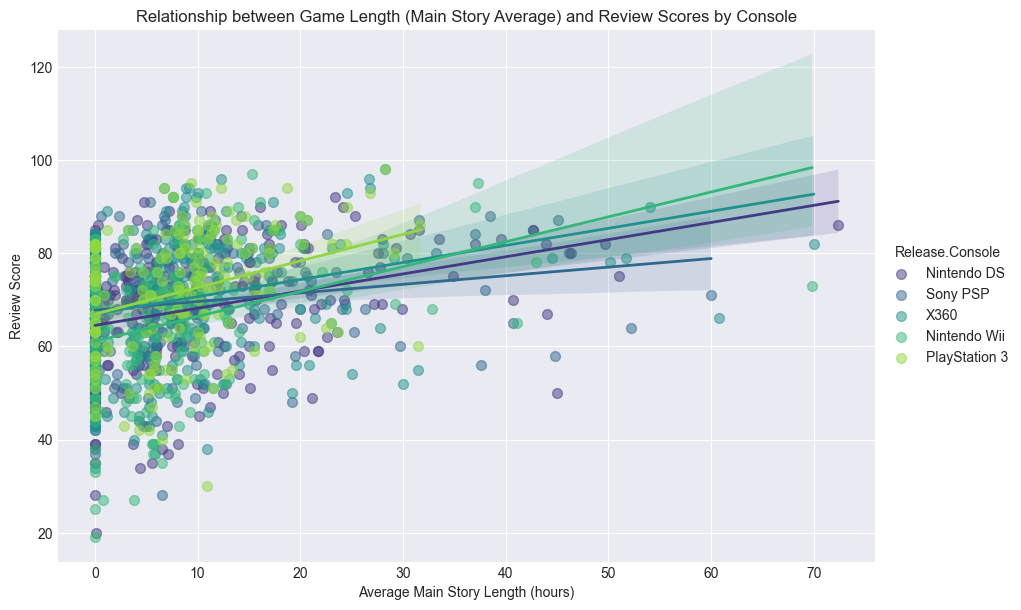

In [17]:
plt.figure(figsize=(15, 10))

sns.lmplot(data=video_game, x='Length.Main Story.Average', y='Metrics.Review Score', hue='Release.Console', 
           height=6, aspect=1.5, scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'lw': 2}, palette='viridis')

plt.title('Relationship between Game Length (Main Story Average) and Review Scores by Console')
plt.xlabel('Average Main Story Length (hours)')
plt.ylabel('Review Score')
plt.show()


**Observations**:
1. **Nintendo DS**: Games on this console show a relatively neutral correlation between game length and review score, with a slight trend suggesting longer games have slightly higher review scores.
2. **Sony PSP**: Similar to the Nintendo DS, the Sony PSP also shows a neutral correlation, with some longer games achieving both high and low review scores.
3. **X360**: For the Xbox 360, there's a mild upward trend indicating that longer games tend to have slightly higher review scores.
4. **Nintendo Wii**: The Wii games scatter widely, but there's a mild trend suggesting longer games might receive slightly better scores.
5. **PlayStation 3**: Games on the PS3 show a neutral to slight upward trend, suggesting that game length doesn't significantly impact the review scores, but longer games tend to achieve slightly higher ratings.

**Overall**: Across all consoles, there isn't a strong correlation between game length (main story average) and review scores. While there are slight upward trends for some consoles, the relationship isn't pronounced. This suggests that while game length might contribute to the game's quality, other factors play a more crucial role in determining its review score.

In [18]:
correlation_by_console = video_game.groupby('Release.Console').apply(lambda x: x['Length.Main Story.Average'].corr(x['Metrics.Review Score']))

correlation_by_console


Release.Console
Nintendo DS      0.326318
Nintendo Wii     0.329667
PlayStation 3    0.312329
Sony PSP         0.165274
X360             0.265090
dtype: float64

The Pearson correlation coefficients between game length (main story average) and review scores for each console are as follows:

1. **Nintendo DS**: 0.326
2. **Nintendo Wii**: 0.330
3. **PlayStation 3**: 0.312
4. **Sony PSP**: 0.165
5. **X360**: 0.265

**Interpretation**:
- Values close to 1 indicate a strong positive linear relationship, values close to -1 indicate a strong negative linear relationship, and values close to 0 indicate a weak or no linear relationship.
- For consoles like the **Nintendo DS**, **Nintendo Wii**, and **PlayStation 3**, there's a mild positive correlation between game length and review scores. This suggests that on these platforms, longer games might slightly tend to receive better review scores.
- For the **Sony PSP**, the correlation is relatively weaker, suggesting game length has a lesser influence on review scores.
- The **X360** also shows a moderate positive correlation.

In [19]:
game_length_stats = video_game.groupby('Release.Console')['Length.Main Story.Average'].describe()

review_score_stats = video_game.groupby('Release.Console')['Metrics.Review Score'].describe()

game_length_stats, review_score_stats


(                 count      mean        std  min       25%       50%  \
 Release.Console                                                        
 Nintendo DS      317.0  9.158938  10.985484  0.0  0.416667  5.833333   
 Nintendo Wii     187.0  7.103565   8.766393  0.0  0.000000  5.800000   
 PlayStation 3    179.0  8.453631   7.058819  0.0  3.000000  8.233333   
 Sony PSP         242.0  7.847107  10.182496  0.0  0.000000  5.250000   
 X360             287.0  9.117712   9.671016  0.0  3.258333  8.000000   
 
                        75%        max  
 Release.Console                        
 Nintendo DS      12.633333  72.383333  
 Nintendo Wii      9.450000  69.833333  
 PlayStation 3    11.575000  31.700000  
 Sony PSP         10.000000  60.000000  
 X360             11.291667  70.000000  ,
                  count       mean        std   min    25%   50%   75%   max
 Release.Console                                                            
 Nintendo DS      317.0  67.864353  12.386084

Here are the descriptive statistics for game lengths (main story average) and review scores, broken down by console:

**Game Length (Main Story Average) by Console**:
- **Nintendo DS**: The average game length is approximately 9.16 hours, with a wide spread (std: 10.99 hours) and a median of 5.83 hours. The longest game requires about 72.38 hours.
- **Nintendo Wii**: The average game length is approximately 7.10 hours, with a spread of 8.77 hours, and a median of 5.80 hours. The longest game takes around 69.83 hours.
- **PlayStation 3**: The average game length is about 8.45 hours, with a spread of 7.06 hours, and a median of 8.23 hours. The longest game requires 31.70 hours.
- **Sony PSP**: The average game length is around 7.85 hours, with a spread of 10.18 hours, and a median of 5.25 hours. The longest game takes approximately 60 hours.
- **X360**: The average game length is approximately 9.12 hours, with a spread of 9.67 hours, and a median of 8 hours. The longest game on this console requires 70 hours.

**Review Scores by Console**:
- **Nintendo DS**: The average review score is 67.86, with a spread (std deviation) of 12.39 points and a median score of 69.
- **Nintendo Wii**: The average review score is 64.87, with a spread of 14.20 points and a median score of 67.
- **PlayStation 3**: The average review score is 71.74, with a spread of 12.89 points and a median score of 74.
- **Sony PSP**: The average review score is 69.21, with a spread of 11.37 points and a median score of 71.
- **X360**: The average review score is 70.33, with a spread of 13.37 points and a median score of 72.


In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 12))

sns.boxplot(data=video_game, x='Release.Console', y='Length.Main Story.Average', ax=ax[0], palette='viridis')
ax[0].set_title('Distribution of Game Length (Main Story Average) by Console')
ax[0].set_xlabel('Console')
ax[0].set_ylabel('Average Main Story Length (hours)')

sns.boxplot(data=video_game, x='Release.Console', y='Metrics.Review Score', ax=ax[1], palette='viridis')
ax[1].set_title('Distribution of Review Scores by Console')
ax[1].set_xlabel('Console')
ax[1].set_ylabel('Review Score')

plt.tight_layout()
plt.show()


Here are the boxplot visualizations for game lengths (main story average) and review scores, segregated by console:

**Game Length (Main Story Average) by Console**:
- **Nintendo DS**: While the majority of games have shorter playtimes, there are several outliers that significantly exceed the average length.
- **Nintendo Wii**: The Wii has a similar pattern to the DS with a few games that have much longer playtimes.
- **PlayStation 3**: The PS3 shows a relatively compact distribution, with fewer extreme outliers in game length.
- **Sony PSP**: There's a wide spread in game lengths, with a few games taking significantly longer than the majority.
- **X360**: The distribution is somewhat similar to the PS3, with most games clustering around the average but some games taking longer.

**Review Scores by Console**:
- **Nintendo DS**: The review scores spread across a range, with a median closer to 70.
- **Nintendo Wii**: The Wii shows a wider distribution of review scores, suggesting varied game quality.
- **PlayStation 3**: PS3 games tend to have higher median review scores, with most games receiving scores around the 70-80 range.
- **Sony PSP**: The distribution is relatively even, with a median score around 70.
- **X360**: The X360 has a similar pattern to the PS3, with most games receiving scores in the 70-80 range.

## 5. Conclusion

In our exploration of the video game dataset, we unearthed several noteworthy patterns that highlight the gaming industry's trends and dynamics:

- **Dataset Composition**: The dataset provided insights into 908 video games. This comprehensive collection allowed for a holistic understanding of game genres, platforms, and sales dynamics.
- **Game Quality**: The average review score of games hovered around 68.83, with a median score of 70. This indicates a general positive reception of games in the dataset.
- **Genre Popularity**: "Action" emerged as the predominant genre, underlining its widespread appeal among gamers. This was closely followed by genres like "Sports" and "Strategy", showcasing the diverse gaming preferences.
- **Top Publishers**: Industry giants such as EA, Ubisoft, and Activision dominated the dataset in terms of game publications, reiterating their significant influence in the gaming world.

These findings are instrumental for various stakeholders in the gaming industry. Game developers can gauge the popularity of different genres, while marketers can strategize their campaigns based on the leading publishers and average game reviews. 

However, as with any data-driven analysis, certain limitations exist. The dataset's specific timeframe may exclude recent industry developments, and potential biases in data collection can influence our conclusions.

Looking forward, a more granular analysis that includes user reviews, multiplayer trends, or even DLC (downloadable content) sales can offer even richer insights into the ever-evolving world of video games.